<a href="https://colab.research.google.com/github/KachanVlg/ML-studying/blob/main/ML_LR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random
import sklearn.utils as sku
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

      x1  x2       y
0   2104   3  399900
1   1600   3  329900
2   2400   3  369000
3   1416   2  232000
4   3000   4  539900
5   1985   4  299900
6   1534   3  314900
7   1427   3  198999
8   1380   3  212000
9   1494   3  242500
10  1940   4  239999
11  2000   3  347000
12  1890   3  329999
13  4478   5  699900
14  1268   3  259900
15  2300   4  449900
16  1320   2  299900
17  1236   3  199900
18  2609   4  499998
19  3031   4  599000
20  1767   3  252900
21  1888   2  255000
22  1604   3  242900
23  1962   4  259900
24  3890   3  573900
25  1100   3  249900
26  1458   3  464500
27  2526   3  469000
28  2200   3  475000
29  2637   3  299900
30  1839   2  349900
31  1000   1  169900
32  2040   4  314900
33  3137   3  579900
34  1811   4  285900
35  1437   3  249900
36  1239   3  229900
37  2132   4  345000
38  4215   4  549000
39  2162   4  287000
40  1664   2  368500
41  2238   3  329900
42  2567   4  314000
43  1200   3  299000
44   852   2  179900
45  1852   4  299900
46  1203   3 

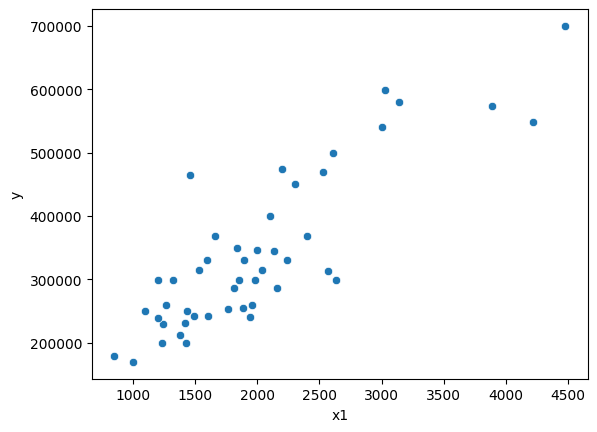

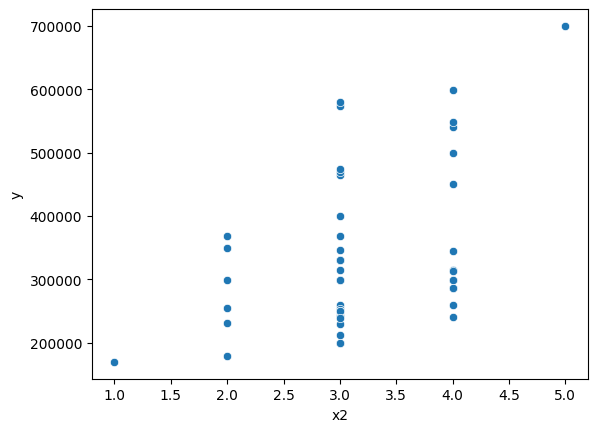

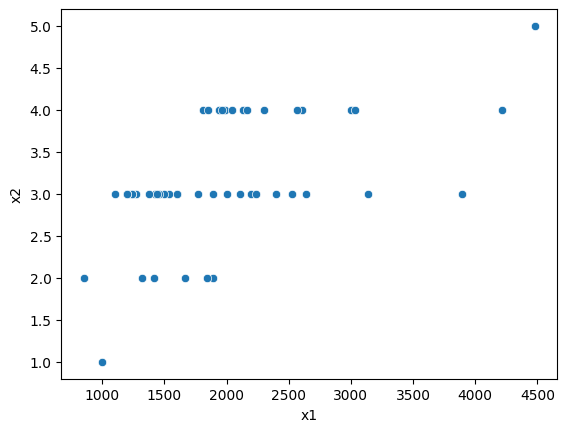

In [2]:
col_names = ['x1', 'x2','y']
path_dataset = "/content/drive/MyDrive/ML-studying/ex1data2.txt"

data_frame = pd.read_csv(path_dataset, names=col_names)

print(data_frame)
print('\n')

sb.scatterplot(data_frame, x='x1', y='y')
plt.show()
print('\n')

sb.scatterplot(data_frame, x='x2', y='y')
plt.show()
print('\n')

sb.scatterplot(data_frame, x='x1', y='x2')
plt.show()

In [3]:
#Разбиение на train и test

data = data_frame.values
np.random.shuffle(data)
data_train, data_test = np.split(data, [int(0.5 * len(data))])

In [4]:
#Стандартизация

mean_dev = np.mean(data_train[:, :-1], axis=0)
std_dev = np.std(data_train[:, :-1], axis=0)

def standard(data_to_std, mean_dev, std_dev):
  data_to_std[:] = (data_to_std - mean_dev)/std_dev

standard(data_train[:,:-1], mean_dev, std_dev)
standard(data_test[:,:-1], mean_dev, std_dev)

In [5]:
data_train = np.insert(data_train, 0, 1, axis=1)
data_test = np.insert(data_test, 0, 1, axis=1)

In [6]:
def calc_h(xs: np.ndarray, thetas: np.ndarray) -> np.ndarray:
  return xs @ thetas

def calc_J(h: np.ndarray, y: np.ndarray) -> float:
  return ((h-y)**2).mean()

def calc_grad(h: np.ndarray, y: np.ndarray, xs: np.ndarray) -> float:
  return ((y-h) @ xs).mean()


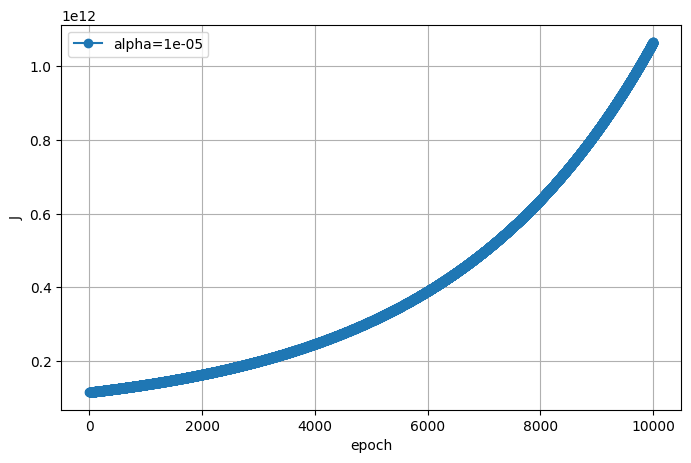

In [9]:
batch_size: int = 8
epoch_num = 10000
J_history = []
thetas = np.random.rand(3)
alpha = 1e-5

for _ in range(epoch_num):
  np.random.shuffle(data_train)

  for i in range(0, len(data_train), batch_size):

    #Срез батча
    batch = data_train[i:i+batch_size]

    #
    xs = batch[:, :-1]
    y  = batch[:, -1]
    h = calc_h(xs, thetas)

    grad = calc_grad(h, y, xs)
    thetas = thetas - alpha*grad

  J_history.append(calc_J(calc_h(data_train[:, :-1], thetas), data_train[:, -1]))


epochs = range(len(J_history))
plt.figure(figsize=(8, 5))
plt.plot(epochs, J_history, marker="o", label=f"alpha={alpha}")
plt.xlabel("epoch")
plt.ylabel("J")
plt.legend()
plt.grid(True)
plt.show()